# <div style="text-align: right;"> رگرسیون: تمرین اول </div>
## <div style="text-align: right">9744010397  دانشجو :  فتحی
</div>

In [154]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

**<div style="text-align: right"> نوع کلیدهای دیتاست را مشخص می کند این پرامتر اجباری نیست </div>**


In [155]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

**<div style="text-align: right"> دیتاست را بااستفاده از کتابخانه پاندا می خوانیم </div>**


In [156]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

**<div style="text-align: right">تابع زیر با گرفتن ویژگی(متراژ خانه) قیمت خانه را پیش بینی میکند   </div>**


In [157]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values = intercept + (slope * input_feature)
    return predicted_values

**<div style="text-align: right">  تابع زیر بررسی میکند که با شیب خط و عرض مبدا بدست آمده به چه میزان پیش بینی درست است . بهترین حالت مقدار صفر می باشد و هر چه قدر مقدار افزایش یابد دلیل بر خوب عمل نکردن مدل است.  </div>**


In [158]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):

    predicted_values = get_regression_predictions(input_feature, intercept, slope)
    residuals = output - predicted_values
    RSS = (residuals ** 2).sum()
    
    return(RSS)

**<div style="text-align: right">  تابع زیر جهت رسم مدل استفاده میشود  </div>**


In [159]:
def plot_regression_line(x, y, intercept, slope, xlabel='x', ylabel='y'): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
    
        # predicted response vector 
    y_pred = get_regression_predictions(x, intercept, slope)
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
  
    # function to show plot 
    plt.show() 

**<div style="text-align: right">      در سناریو اول با استفاده از ۲ حلقه شروع به حدس زدن شیب خط و عرض از مبدا می شویم در این حالت از یک مقدار اولیه شروع میکنیم و  خطا را محاسبه میکنیم در صورتی که مقدار خطا کاهش یافته بود در یک متغییر ذخیره میکنیم و این کار را تا پایان حلقه ادامه می دهیم</div>**


In [171]:
def first_scenario(input_feature,output, intercept=-47100, slope=250):
    min_rss =  math.inf
    
    for i in range(intercept-100,intercept+100):
        for s in range(slope-100,slope+100):
            rss = get_residual_sum_of_squares(input_feature, output, i, s)
            if rss < min_rss:
                min_rss = rss
                exact_intercept = i
                exact_slope = s
    plot_regression_line(input_feature,output, exact_intercept, exact_slope)
    return (min_rss, exact_intercept, exact_slope)

**<div style="text-align: right">در سناریو دوم با استفاده از مشتق جزیی به ۲ فرمول برای محاسبه شیب خط و عرض از مبدا می رسیم و سپس مساوی صفر قرار میدهیم  و از فرمول های بدست آمده جهت محاسبه شیب خط و عرض از مبدا استفاده می کنیم      </div>**


In [173]:
#Set gradient = 0
def second_scenario(input_feature,output):
    n = input_feature.size
    x = input_feature
    y = output
    
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    slope = SS_xy / SS_xx 
    intercept = m_y - slope*m_x 
    rss = get_residual_sum_of_squares(input_feature, output, intercept, slope)
    plot_regression_line(input_feature,output, intercept, slope)
    return(rss, intercept, slope) 

**<div style="text-align: right">   در سناریو ۳ با استفاده از گرادیان کاهشی به دنبال بهینه ترین شیب و عرض از مبدا می باشیم به این صورت که  سعی کنیم با دستکاری شیب و عرض از مبدا به نقطه مینیمم نزدیک شویم برای اینکار به یک متغییر نرخ یادگیری هم برای کنترل  شیب  که در هر مرحله چقدر تغییر کند نیاز داریم این عدد بین صفر و یک باشد.
در این روش هم مانند سناریو قبل با استفاده از مشتقات جزپی عملکرد ضرر را با توجه به شیب خط محاسبه میکنیم.</div>**


In [177]:
#Gradient Descent
def third_scenario(input_feature,output):
#     plt.rcParams['figure.figsize'] = (12.0, 9.0)
    X = input_feature
    Y = output
#     plt.scatter(X,Y)
#     plt.show()
    
    w1 = 0 #slope
    w0 = 0 #intercept

    learning_rate = 0.0001  # The learning Rate
    num_iteartions = 10  # The number of iterations to perform gradient descent

    n = float(len(X)) # Number of elements in X
    
    # Performing Gradient Descent 
    for i in range(num_iteartions):
        Y_pred = get_regression_predictions(X,w0,w1)
        D_w1 = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt w1
        D_w0 = (-2/n) * sum(Y - Y_pred)  # Derivative wrt w0
        w1 = w1 - learning_rate * D_w1  # Update w1
        w0 = w0 - learning_rate * D_w0  # Update w0
    plot_regression_line(input_feature,output, w0, w1)
    return [get_residual_sum_of_squares(input_feature,output,w0,w1),w0,w1]

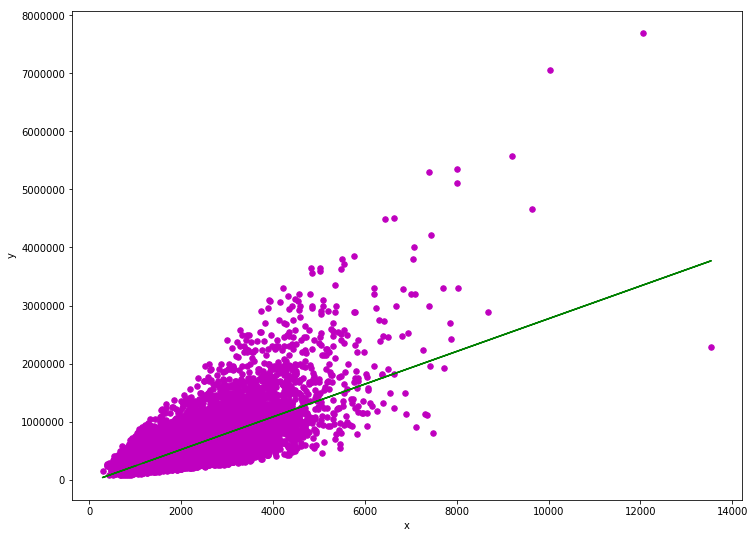

Intercept: -47200
Slope: 282
The RSS of predicting Prices based on Square Feet is : 1201918379241976.0


In [172]:
rss,intercept,slope = first_scenario(train_data['sqft_living'].values, train_data['price'].values)
print ("Intercept: " + str(intercept))
print ("Slope: " + str(slope))
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss))

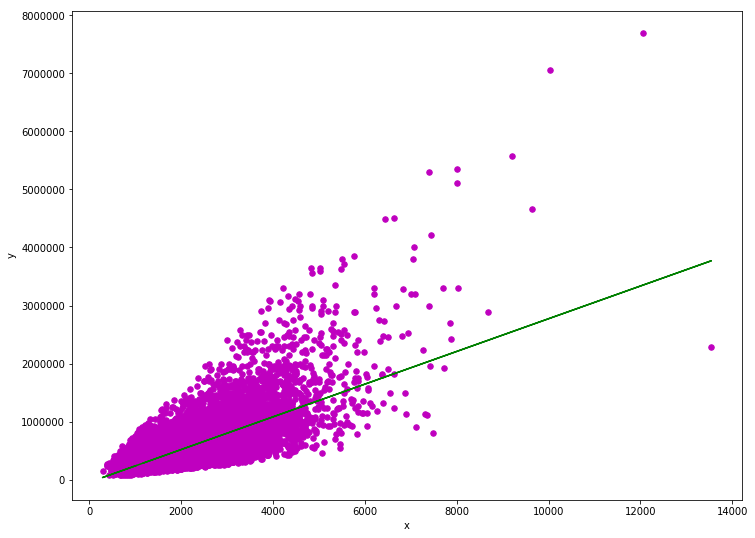

Intercept: -47116.07907289418
Slope: 281.9588396303426
The RSS of predicting Prices based on Square Feet is : 1201918354177283.0


In [174]:
rss,intercept,slope = second_scenario(train_data['sqft_living'].values, train_data['price'].values)
print ("Intercept: " + str(intercept))
print ("Slope: " + str(slope))
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss))

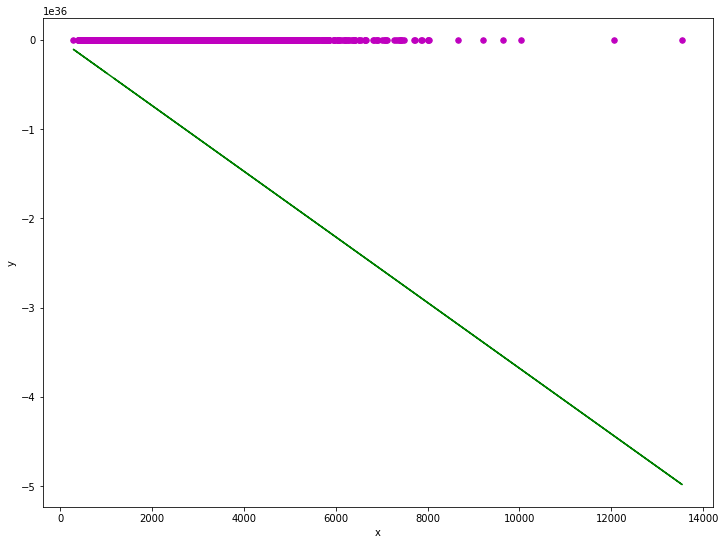

Intercept: -1.4791914976490142e+29
Slope: -3.680771621466074e+32
The RSS of predicting Prices based on Square Feet is : 1.2190220957265201e+76


In [178]:
rss,intercept,slope = third_scenario(train_data['sqft_living'].values, train_data['price'].values)
print ("Intercept: " + str(intercept))
print ("Slope: " + str(slope))
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss))